In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
pd.options.display.max_columns = None
import joblib
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    roc_curve, auc, classification_report, 
    matthews_corrcoef, accuracy_score, confusion_matrix
)
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import shapiro, anderson, kstest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [3]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

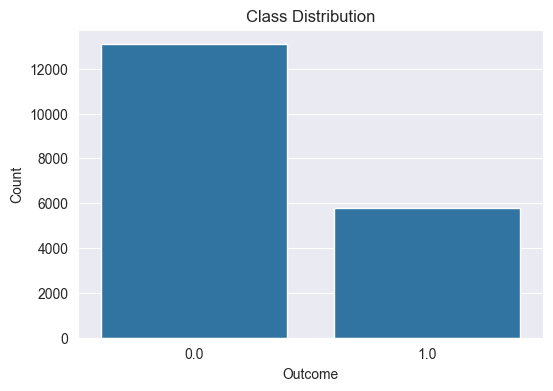

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='OUTCOME_WITHIN_4_YEARS', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [5]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

In [10]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.25, upper_quantile=0.75)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=20, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8))
])

lgbm_pipeline.fit(X_train, y_train)

test_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10493, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3054
[LightGBM] [Info] Number of data points in the train set: 20986, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9299029461832834
Testing roc_auc: 0.9113677472763116


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [6]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.25, upper_quantile=0.75)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=mutual_info_classif, k=100)
rfe = RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=50)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=20, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8))
])

lgbm_pipeline.fit(X_train, y_train)

test_proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)

train_proba = lgbm_pipeline.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")

C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10493, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9132
[LightGBM] [Info] Number of data points in the train set: 20986, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training roc_auc: 0.9685439573346066
Testing roc_auc: 0.9584196738304486


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [11]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.25, upper_quantile=0.75)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

lgbm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8, random_state=22))
])

param_grid_lgbm = {
    'classifier__max_depth': [7, 10, 12, 20]
}

grid_search_lgbm = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=param_grid_lgbm,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=2
)

grid_search_lgbm.fit(X_train, y_train)
print("RF Best Parameters:", grid_search_lgbm.best_params_)
print("Best roc_auc score:", grid_search_lgbm.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Bakalarka\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 10493, number of negative: 10493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2835
[LightGBM] [Info] Number of data points in the train set: 20986, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
RF Best Parameters: {'classifier__max_depth': 7}
Best roc_auc score: 0.9200092618782684


early stopping:

In [20]:
from lightgbm import early_stopping, log_evaluation

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_var = var_thresh.fit_transform(X_train_trans, y_train)
X_k = select_k.fit_transform(X_var, y_train)
X_rfe = rfe.fit_transform(X_k, y_train)

X_test_var = var_thresh.transform(X_test_trans)
X_test_k = select_k.transform(X_test_var)
X_test_rfe = rfe.transform(X_test_k)

clf = LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=20,
    min_child_samples=20,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    is_unbalance=True, 
    random_state=2
)

clf.fit(
    X_rfe, y_train,
    eval_set=[(X_test_rfe, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(10)
    ]
)

test_proba = clf.predict_proba(X_test_rfe)[:, 1]
train_proba = clf.predict_proba(X_rfe)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")


[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.924634	valid_0's binary_logloss: 0.571626
[20]	valid_0's auc: 0.925154	valid_0's binary_logloss: 0.530303
[30]	valid_0's auc: 0.925426	valid_0's binary_logloss: 0.497773
[40]	valid_0's auc: 0.925422	valid_0's binary_logloss: 0.470897
[50]	valid_0's auc: 0.925271	valid_0's binary_logloss: 0.449341
[60]	valid_0's auc: 0.925315	valid_0's binary_logloss: 0.430471

C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [19]:
from lightgbm import early_stopping, log_evaluation

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_var = var_thresh.fit_transform(X_train_trans, y_train)
X_k = select_k.fit_transform(X_var, y_train)
X_rfe = rfe.fit_transform(X_k, y_train)

X_test_var = var_thresh.transform(X_test_trans)
X_test_k = select_k.transform(X_test_var)
X_test_rfe = rfe.transform(X_test_k)

clf = LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    min_child_samples=20,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    is_unbalance=True, 
    random_state=2
)

clf.fit(
    X_rfe, y_train,
    eval_set=[(X_test_rfe, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(10)
    ]
)

test_proba = clf.predict_proba(X_test_rfe)[:, 1]
train_proba = clf.predict_proba(X_rfe)[:, 1]

test_roc_auc = roc_auc_score(y_test, test_proba)
train_roc_auc = roc_auc_score(y_train, train_proba)

print(f"Training roc_auc: {train_roc_auc}\nTesting roc_auc: {test_roc_auc}")


[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.924077	valid_0's binary_logloss: 0.571556
[20]	valid_0's auc: 0.92518	valid_0's binary_logloss: 0.530305
[30]	valid_0's auc: 0.925061	valid_0's binary_logloss: 0.497801
[40]	valid_0's auc: 0.925385	valid_0's binary_logloss: 0.470948
[50]	valid_0's auc: 0.925216	valid_0's binary_logloss: 0.449414
[60]	valid_0's auc: 0.92535	valid_0's binary_logloss: 0.430465
[

C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
preprocessor.fit(X_train)

num_features = num_cols.tolist()
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols).tolist()

all_features = num_features + cat_feature_names


X_transformed = preprocessor.transform(X_train)
var_thresh = lgbm_pipeline.named_steps['variance_threshold']
X_var = var_thresh.transform(X_transformed)
features_after_var = [f for f, keep in zip(all_features, var_thresh.get_support()) if keep]

select_k = lgbm_pipeline.named_steps['select_k_best']
X_k = select_k.transform(X_var)
features_after_kbest = [f for f, keep in zip(features_after_var, select_k.get_support()) if keep]

rfe = lgbm_pipeline.named_steps['rfe']
rfe_support = rfe.get_support()
selected_features = [f for f, keep in zip(features_after_kbest, rfe_support) if keep]

print("Final 20 features used in the model:")
for f in selected_features:
    print(f)


Final 20 features used in the model:
CDRSUM
DECSUB
ANIMALS
VEG
TRAILA
TRAILB
COGSTAT
NORMCOG
NACCPPA
NACCALZD
NACCALZP
NACCLBDE
DOWNSIF
DEPIF
OTHPSYIF
DYSILLIF
MEDSIF
COGOTHIF
NACCNORM
NACCUDSD


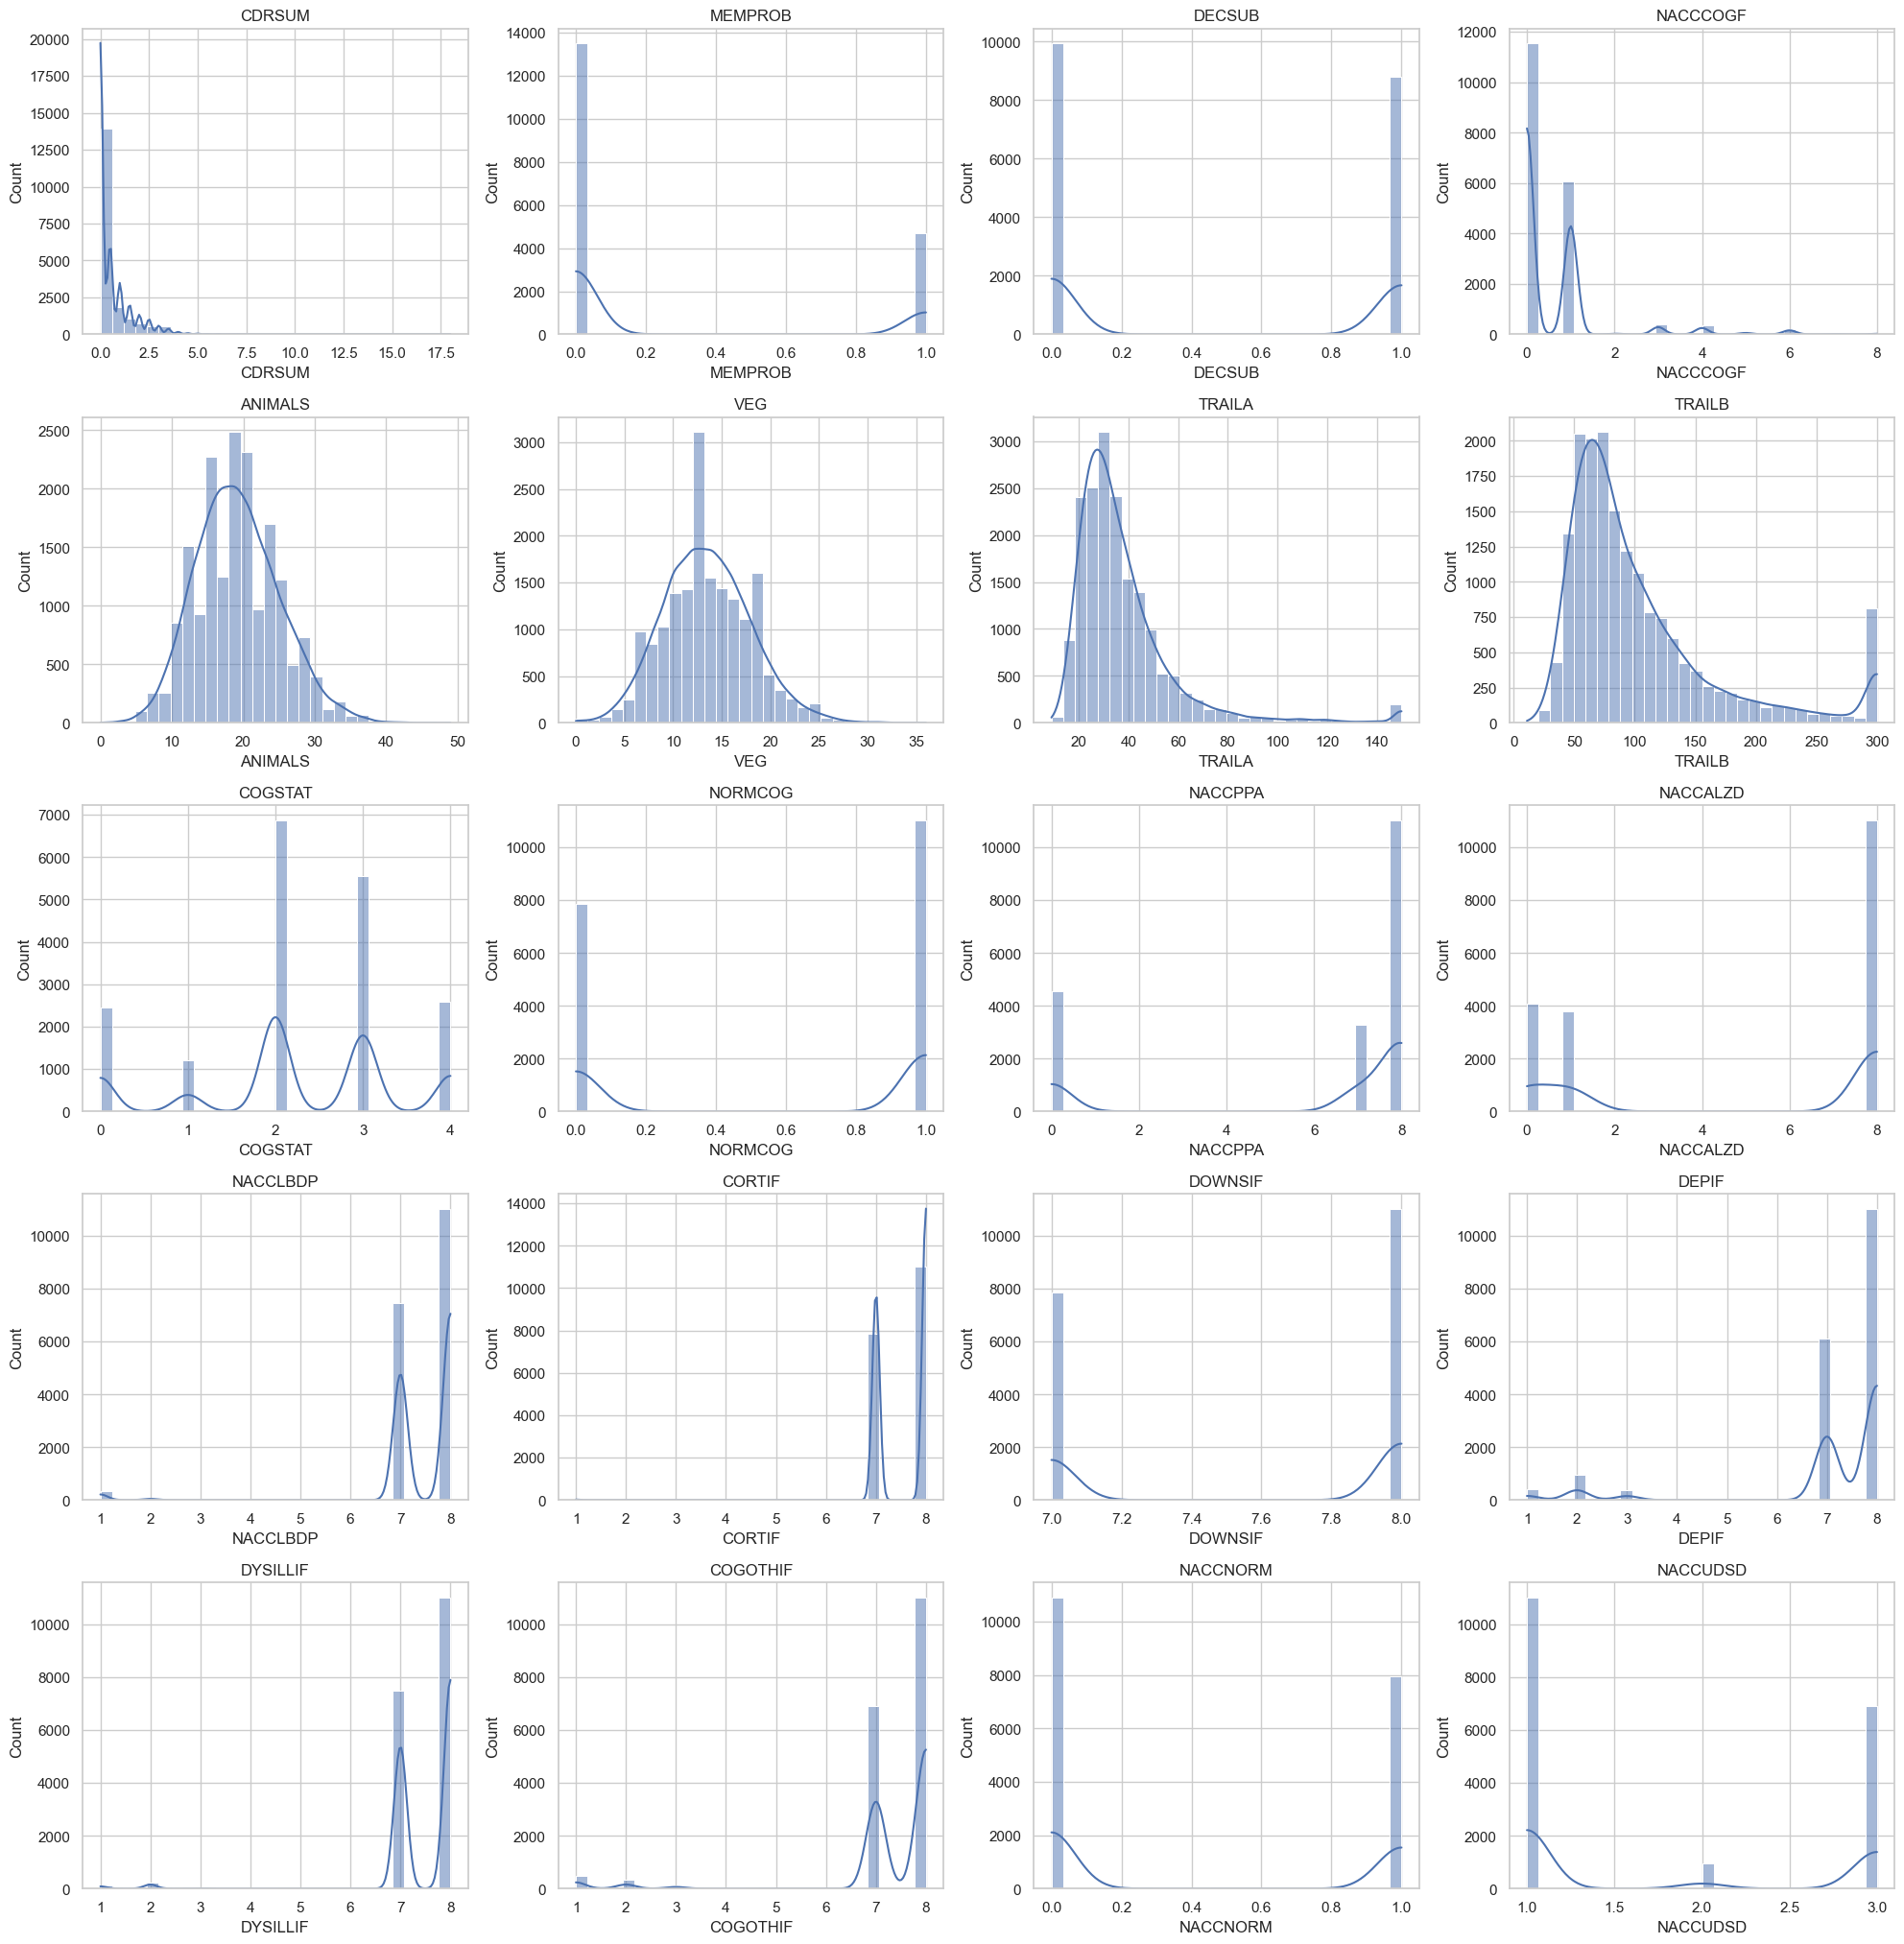

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

final_features = [
    "CDRSUM", "MEMPROB", "DECSUB", "NACCCOGF", "ANIMALS", "VEG", "TRAILA", "TRAILB",
    "COGSTAT", "NORMCOG", "NACCPPA", "NACCALZD", "NACCLBDP", "CORTIF", "DOWNSIF",
    "DEPIF", "DYSILLIF", "COGOTHIF", "NACCNORM", "NACCUDSD"
]

existing_features = [col for col in final_features if col in df.columns]

missing_features = [col for col in final_features if col not in df.columns]
if missing_features:
    print("Missing columns:", missing_features)

child_df = df[existing_features]

sns.set(style="whitegrid")
n = len(existing_features)

plt.figure(figsize=(20, (n // 4 + 1) * 4))
for i, column in enumerate(existing_features, 1):
    plt.subplot((n // 4) + 1, 4, i)
    sns.histplot(child_df[column].dropna(), kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()


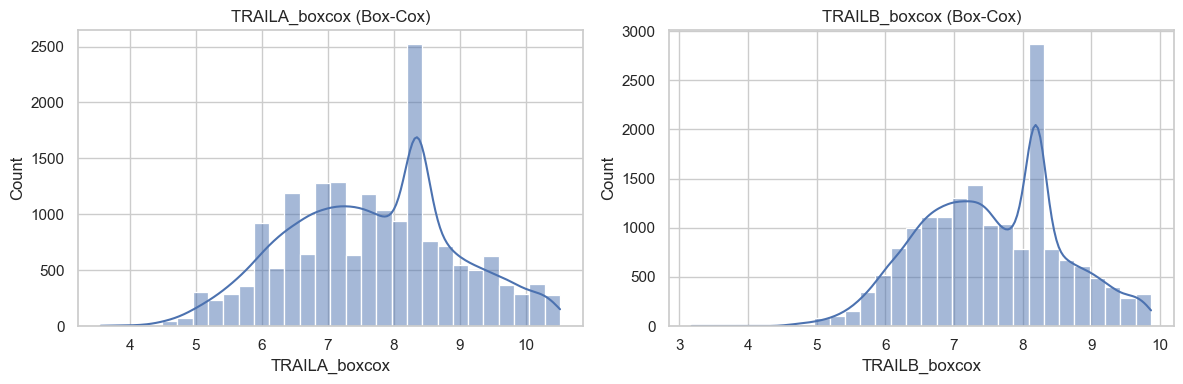

In [41]:
from scipy.stats import boxcox

skewed_features = ['TRAILA', 'TRAILB']
child_df = child_df.copy()
outlier_handler = HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)
child_df_cleaned = outlier_handler.fit_transform(child_df[skewed_features])
child_df_cleaned = pd.DataFrame(child_df_cleaned, columns=skewed_features, index=child_df.index)

boxcox_lambdas = {}
boxcox_features = []

for feature in skewed_features:
    transformed_name = feature + '_boxcox'
    values = child_df_cleaned[feature]

    if (values <= 0).any():
        shift = 1 - values.min()
        values = values + shift
    else:
        shift = 0

    values_nonan = values.dropna()
    transformed, fitted_lambda = boxcox(values_nonan)

    transformed_series = pd.Series(transformed, index=values_nonan.index)

    child_df[transformed_name] = np.nan
    child_df.loc[transformed_series.index, transformed_name] = transformed_series

    boxcox_lambdas[feature] = {'lambda': fitted_lambda, 'shift': shift}
    boxcox_features.append(transformed_name)
fig, axes = plt.subplots(nrows=1, ncols=len(boxcox_features), figsize=(6 * len(boxcox_features), 4))

if len(boxcox_features) == 1:
    axes = [axes]

for ax, feature in zip(axes, boxcox_features):
    sns.histplot(child_df[feature].dropna(), kde=True, bins=30, ax=ax)
    ax.set_title(f"{feature} (Box-Cox)")

plt.tight_layout()
plt.show()


NB preparation:

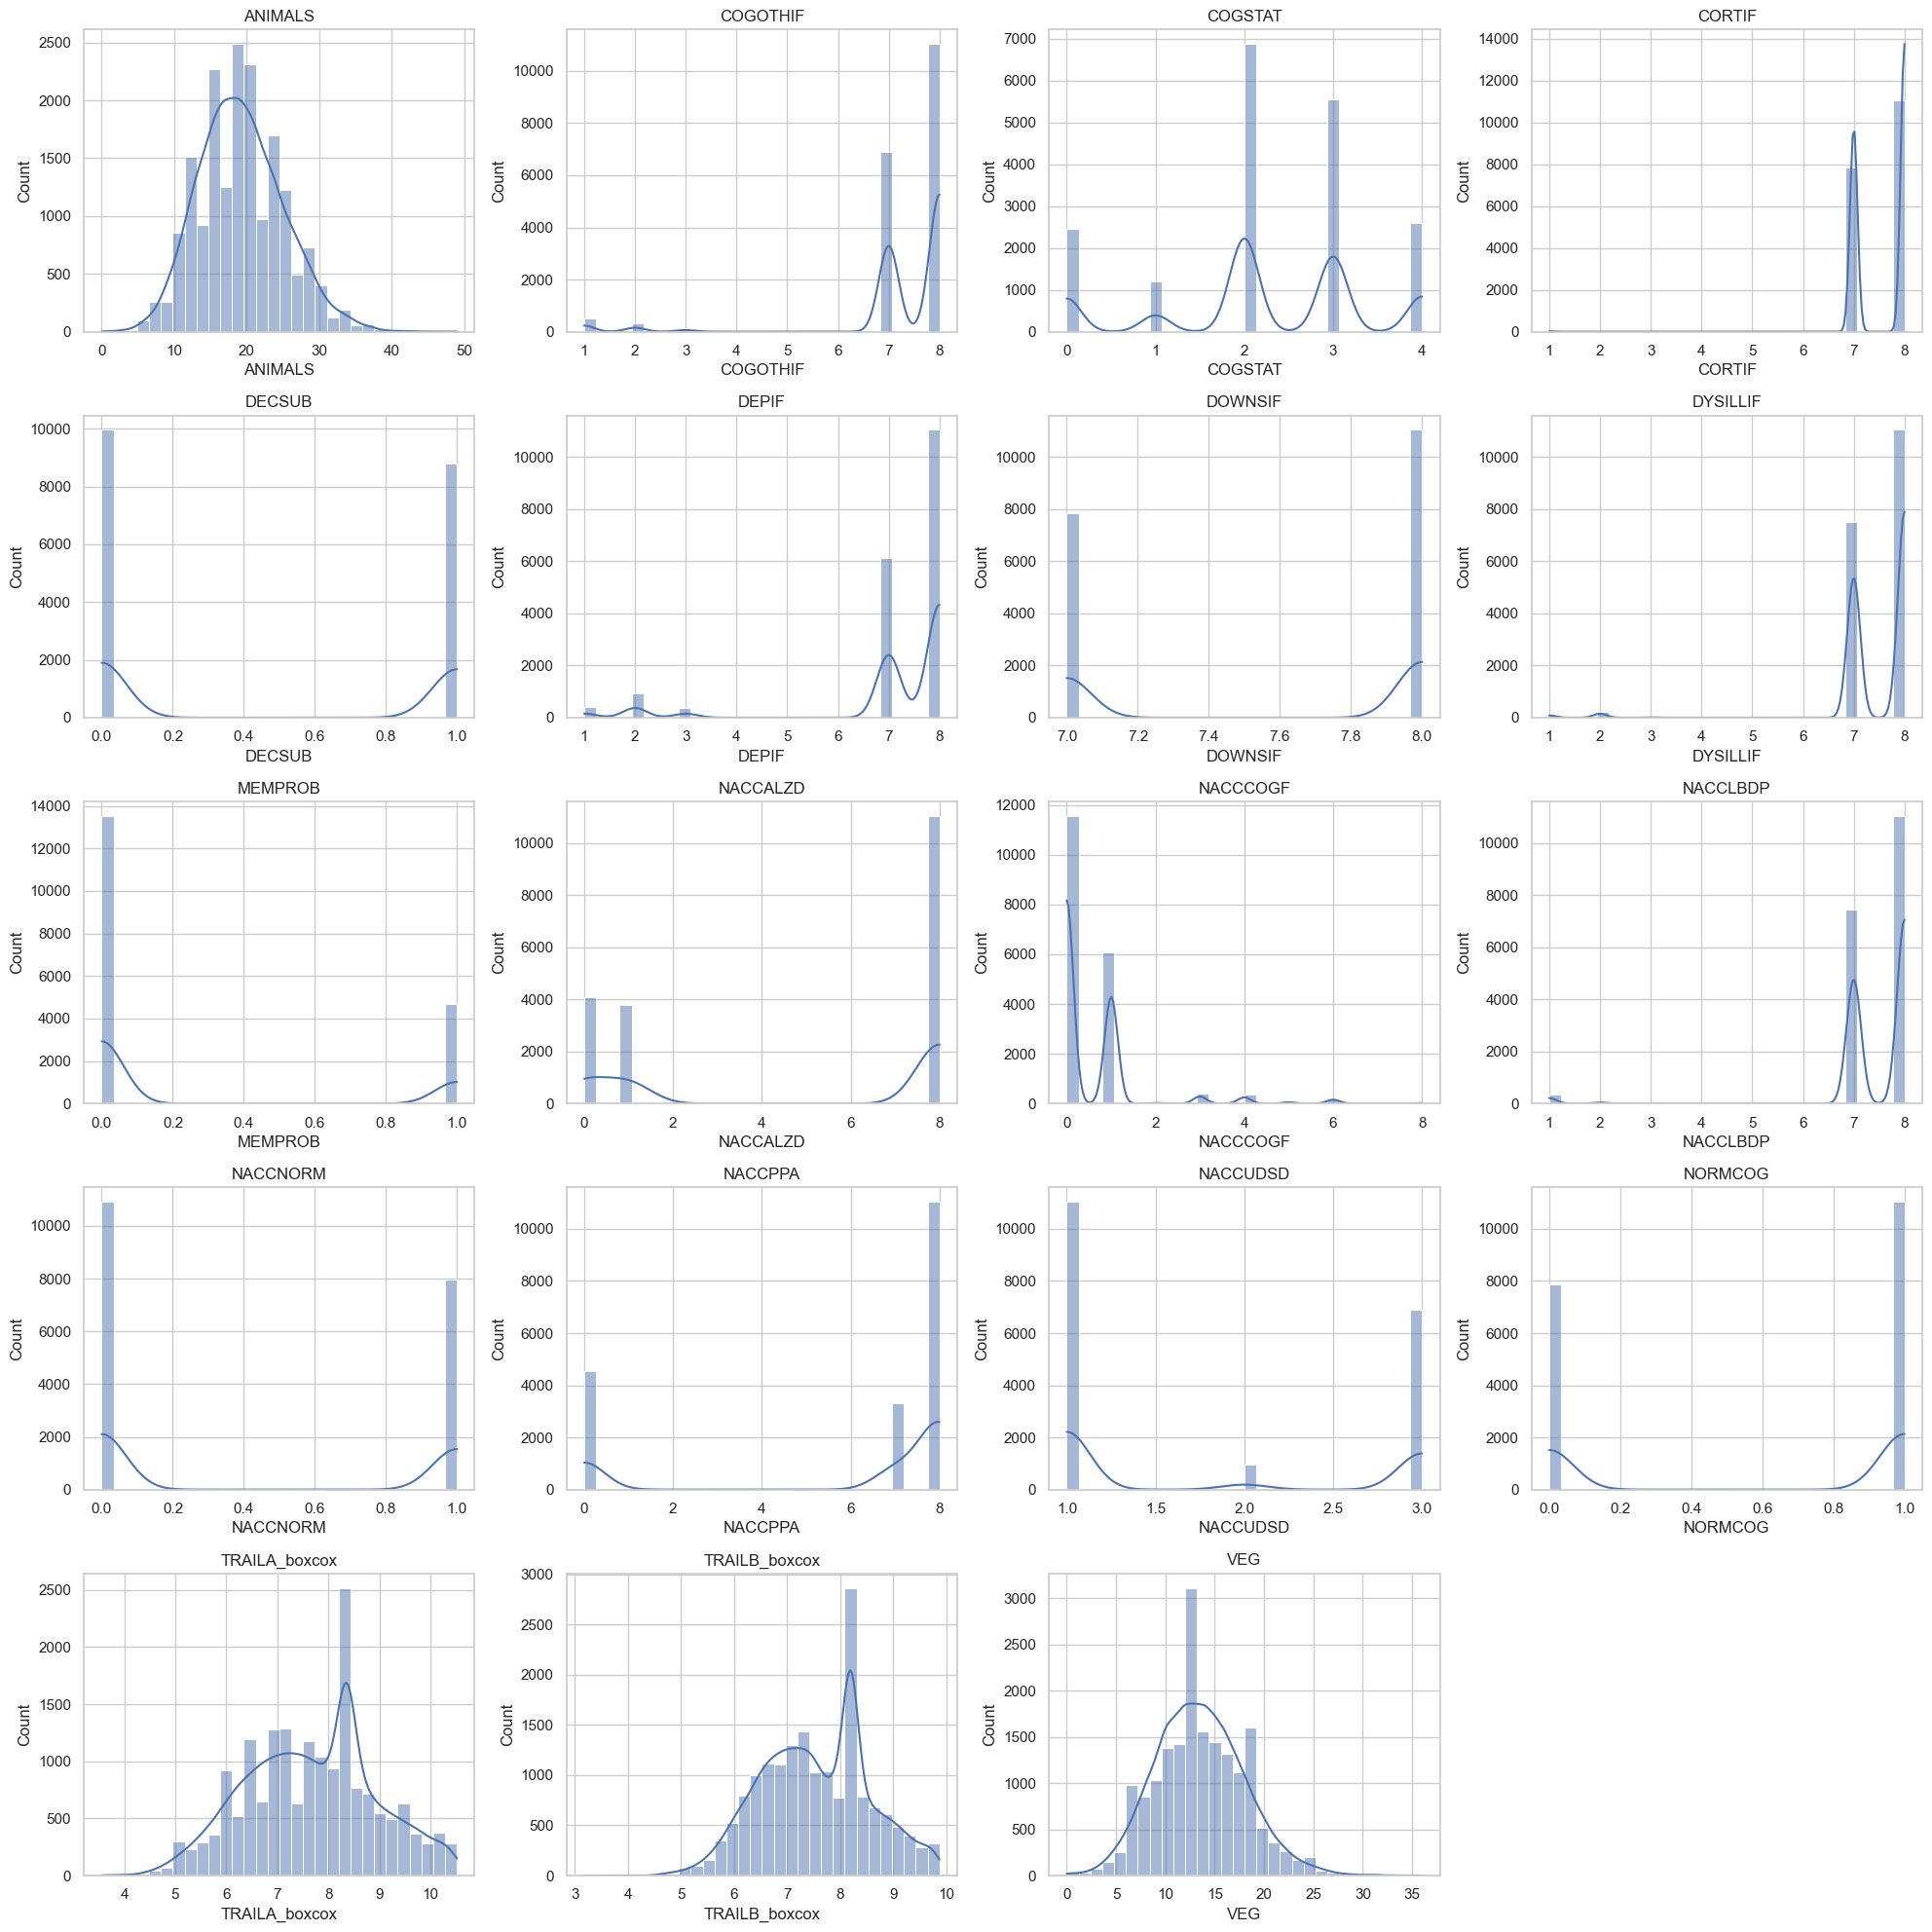

In [45]:
final_features = [
    "CDRSUM", "MEMPROB", "DECSUB", "NACCCOGF", "ANIMALS", "VEG", "TRAILA", "TRAILB",
    "COGSTAT", "NORMCOG", "NACCPPA", "NACCALZD", "NACCLBDP", "CORTIF", "DOWNSIF",
    "DEPIF", "DYSILLIF", "COGOTHIF", "NACCNORM", "NACCUDSD"
]

skewed_features = ['TRAILA', 'TRAILB']

existing_features = [col for col in final_features if col in df.columns]
missing_features = [col for col in final_features if col not in df.columns]
if missing_features:
    print("Missing columns:", missing_features)

child_df = df[existing_features].copy()

outlier_handler = HandleOutliers()
cleaned_skewed_df = outlier_handler.fit_transform(child_df[skewed_features])
cleaned_skewed_df = pd.DataFrame(cleaned_skewed_df, columns=skewed_features, index=child_df.index)

boxcox_lambdas = {}
for feature in skewed_features:
    transformed_name = f"{feature}_boxcox"
    values = cleaned_skewed_df[feature]

    shift = 0
    if (values <= 0).any():
        shift = 1 - values.min()
        values = values + shift

    values_nonan = values.dropna()
    transformed, fitted_lambda = boxcox(values_nonan)

    child_df[transformed_name] = np.nan
    child_df.loc[values_nonan.index, transformed_name] = transformed

    boxcox_lambdas[feature] = {"lambda": fitted_lambda, "shift": shift}

child_df = child_df.drop(columns=skewed_features)
# boxcox_features = [f"{feat}_boxcox" for feat in skewed_features]
child_df = child_df[child_df.columns.difference(skewed_features)].copy()
# child_df = pd.concat([child_df, child_df[boxcox_features]], axis=1)
child_df = child_df.drop('CDRSUM', axis='columns')
sns.set(style="whitegrid")

n_features = len(child_df.columns)
n_cols = 4
n_rows = (n_features // n_cols) + int(n_features % n_cols != 0)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(child_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(child_df[column].dropna(), kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.base import ClassifierMixin

gaussian_features = ['TRAILA_boxcox', 'TRAILB_boxcox', 'VEG', 'ANIMALS']
categorical_features = [col for col in child_df.columns if col not in gaussian_features]

X = child_df.copy()
y = df.loc[child_df.index, 'OUTCOME_WITHIN_4_YEARS']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

gaussian_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

class HybridNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, gaussian_weight=0.5):
        self.gaussian_weight = gaussian_weight
        self.gnb = GaussianNB()
        self.cnb = CategoricalNB()
    
    def fit(self, X, y):
        self.g_indices = slice(0, len(gaussian_features))
        self.c_indices = slice(len(gaussian_features), X.shape[1])
        self.gnb.fit(X[:, self.g_indices], y)
        self.cnb.fit(X[:, self.c_indices], y)
        return self

    def predict(self, X):
        g_pred = self.gnb.predict_proba(X[:, self.g_indices])
        c_pred = self.cnb.predict_proba(X[:, self.c_indices])
        avg_proba = self.gaussian_weight * g_pred + (1 - self.gaussian_weight) * c_pred
        return (avg_proba[:, 1] >= 0.5).astype(int)

    def predict_proba(self, X):
        g_pred = self.gnb.predict_proba(X[:, self.g_indices])
        c_pred = self.cnb.predict_proba(X[:, self.c_indices])
        avg_proba = self.gaussian_weight * g_pred + (1 - self.gaussian_weight) * c_pred
        return avg_proba
    
preprocessor = ColumnTransformer([
    ('gaussian', gaussian_pipeline, gaussian_features),
    ('categorical', categorical_pipeline, categorical_features)
])

for w in [0.0, 0.25, 0.5, 0.75, 1.0]:
    ensemble_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('hybrid_nb', HybridNaiveBayes(gaussian_weight=w))
    ])
    
    ensemble_pipeline.fit(X_train, y_train)
    y_proba = ensemble_pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"Weight {w:.2f} -> ROC AUC: {roc_auc:.4f}")

C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Weight 0.00 -> ROC AUC: 0.8953
Weight 0.25 -> ROC AUC: 0.8820
Weight 0.50 -> ROC AUC: 0.8820
Weight 0.75 -> ROC AUC: 0.8466
Weight 1.00 -> ROC AUC: 0.7590


C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


TODO: otestovat rozne scalingy pre gbm, vyskusat nejake ensemble modely